# Import Library

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

#Audio
import librosa
import librosa.display

#Play Audio
from IPython.display import Audio

#Import warnings
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'librosa'

# Load Dataset

In [ ]:
paths=[]
labels=[]

for dirname, _,filenames in os.walk('D:\My files\CodeClauseInternship/archive (10)\TESS Toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname,filename))
        # print(filename)
        label=filename.split('_')[-1]   #In ABC_DEF_GHI split('_')[-1] will be GHI
        # print(label)
        label=label.split('.')[0]   # In ABC.wav split('.')[0] will be ABC.
        labels.append(label.lower())
        # print(label.lower())
        # break

print('Dataset is Loaded')

Dataset is Loaded


In [ ]:
paths[:5]

['D:\\My files\\CodeClauseInternship/archive (10)\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_back_angry.wav',
 'D:\\My files\\CodeClauseInternship/archive (10)\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bar_angry.wav',
 'D:\\My files\\CodeClauseInternship/archive (10)\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_base_angry.wav',
 'D:\\My files\\CodeClauseInternship/archive (10)\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bath_angry.wav',
 'D:\\My files\\CodeClauseInternship/archive (10)\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bean_angry.wav']

In [ ]:
labels[:5]

['angry', 'angry', 'angry', 'angry', 'angry']

# Create a dataframe

In [ ]:
df=pd.DataFrame()
df['speech']=paths
df['label']=labels
df.head()

,speech,label
0,D:\My files\CodeClauseInternship/archive (10)\...,angry
1,D:\My files\CodeClauseInternship/archive (10)\...,angry
2,D:\My files\CodeClauseInternship/archive (10)\...,angry
3,D:\My files\CodeClauseInternship/archive (10)\...,angry
4,D:\My files\CodeClauseInternship/archive (10)\...,angry


In [ ]:
df['label'].value_counts()

angry      800
disgust    800
fear       800
happy      800
neutral    800
ps         800
sad        800
Name: label, dtype: int64

# Exploratory Data Analysis

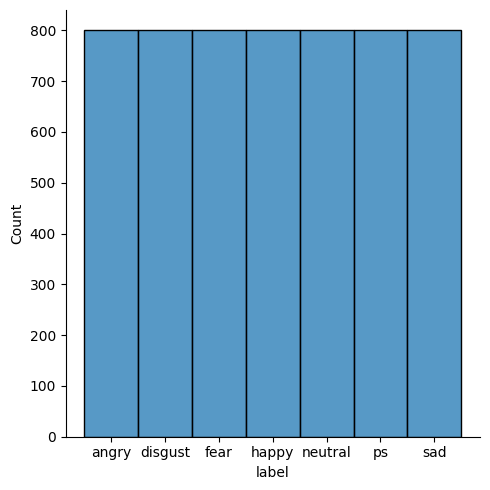

In [ ]:
# sns.countplot(df['label'])
sns.displot(df,x=df['label'])

# Display wave form for audio

In [ ]:
def waveplot(data,sr,emotion):  #Display waveplot
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.waveshow(data,sr=sr)
    # librosa.display.AdaptiveWaveplot(data,sr)
    plt.show()


def spectogram(data,sr,emotion):    #Display the spectogram

    x=librosa.stft(data)
    xdb=librosa.amplitude_to_db(abs(x))

    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.specshow(xdb,sr=sr,x_axis='time',y_axis='hz')
    plt.colorbar()

# Angry

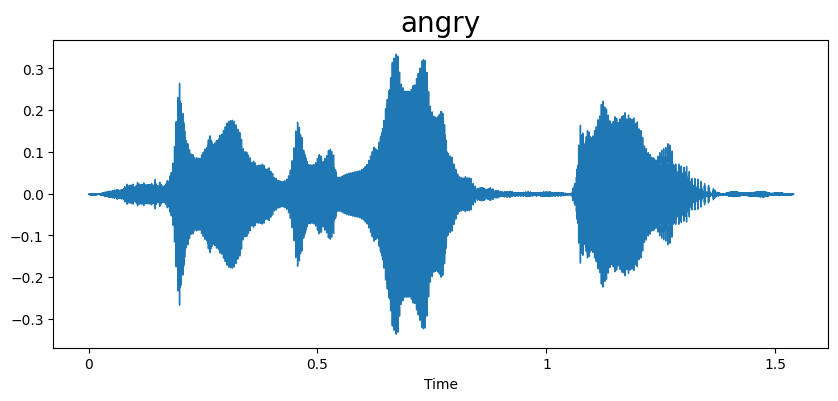

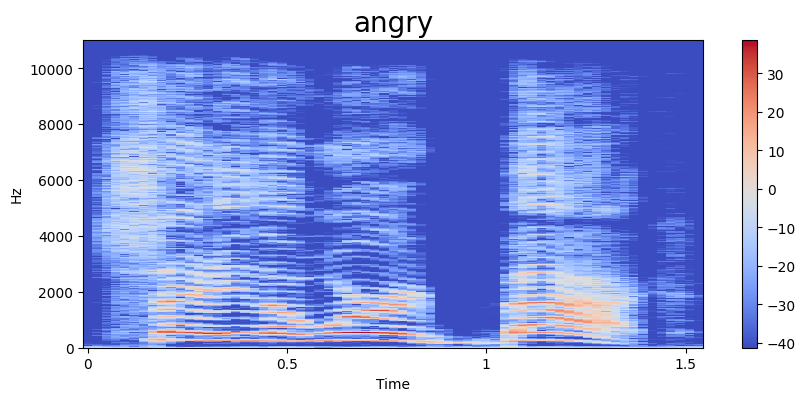

In [ ]:
emotion='angry'
# emotion='fear'
path=np.array(df['speech'][df['label']==emotion])[0]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

# Fear

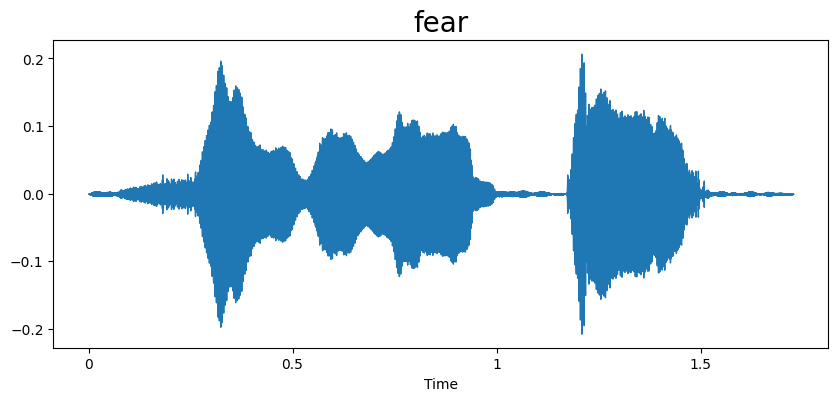

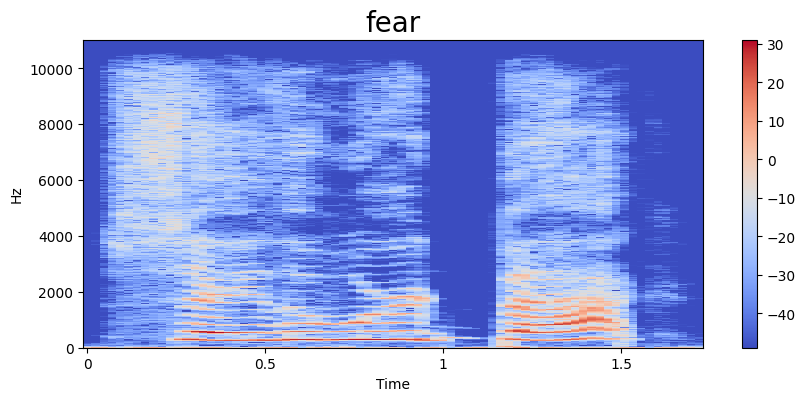

In [ ]:
emotion='fear'
path=np.array(df['speech'][df['label']==emotion])[0]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

# Disgust

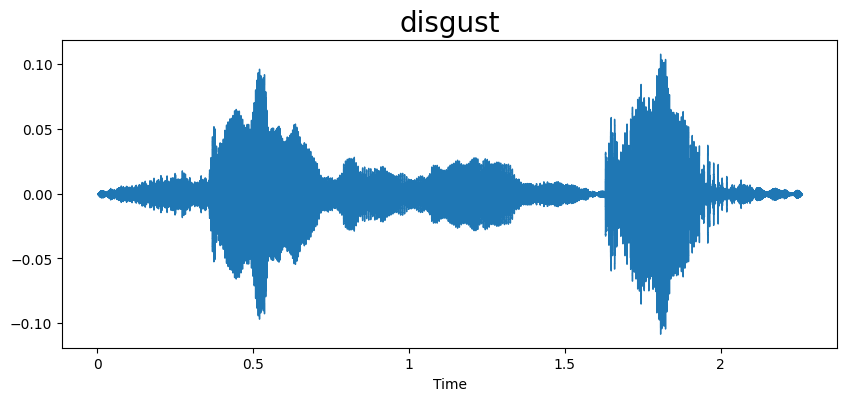

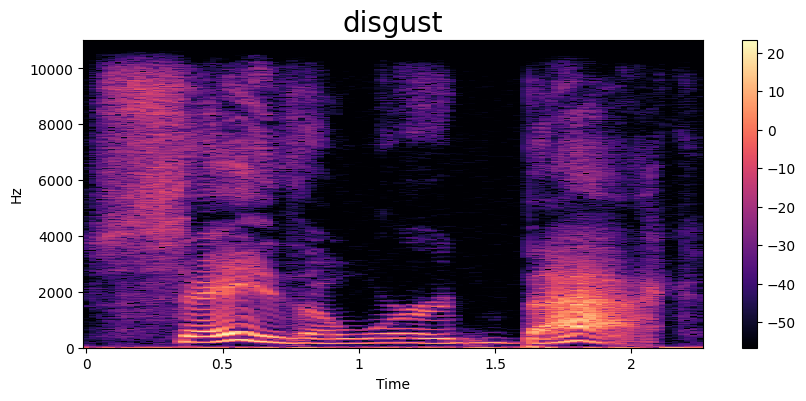

In [ ]:
emotion='disgust'
path=np.array(df['speech'][df['label']==emotion])[0]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

# Happy

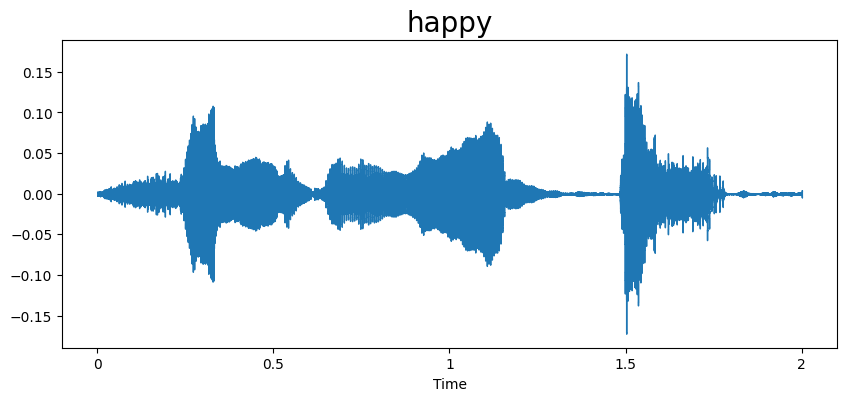

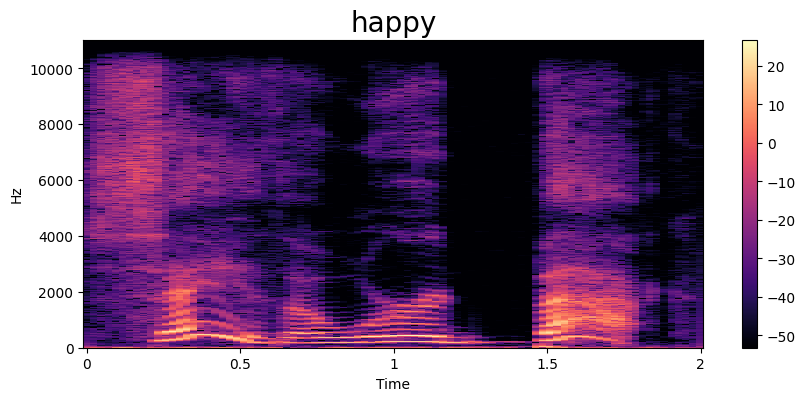

In [ ]:
emotion='happy'
path=np.array(df['speech'][df['label']==emotion])[0]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

# Neutral

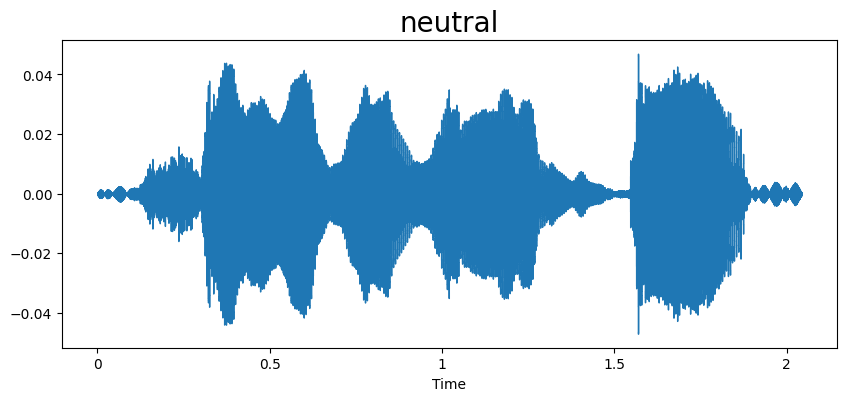

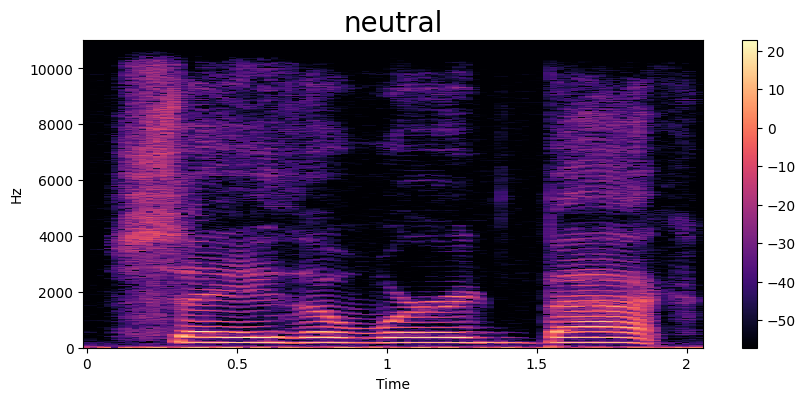

In [ ]:
emotion='neutral'
path=np.array(df['speech'][df['label']==emotion])[0]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

# Sad

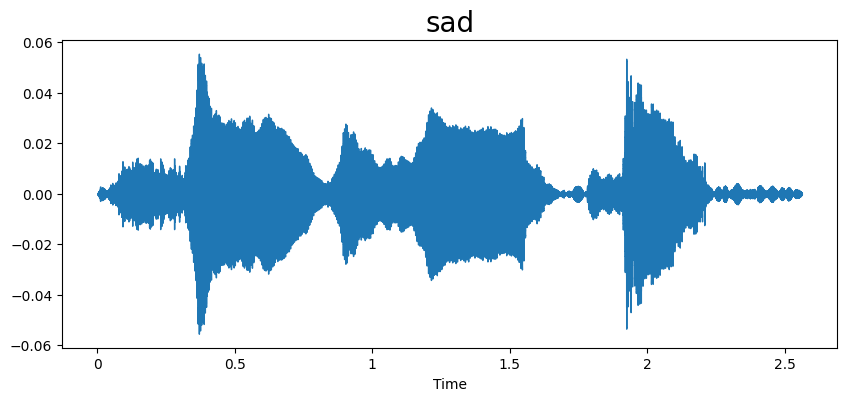

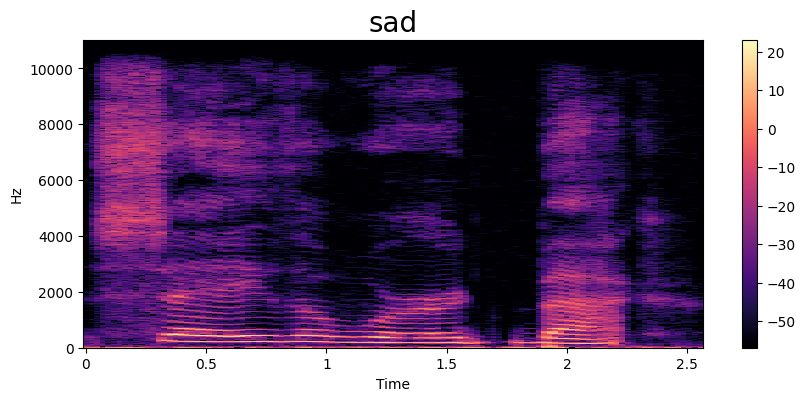

In [ ]:
emotion='sad'
path=np.array(df['speech'][df['label']==emotion])[0]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

# PS

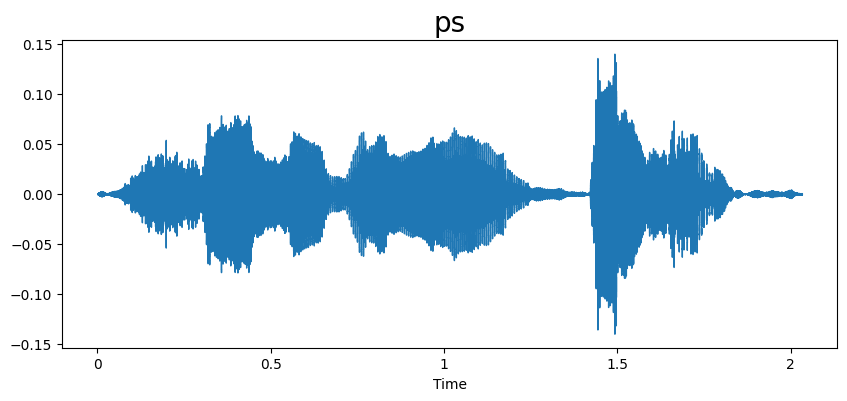

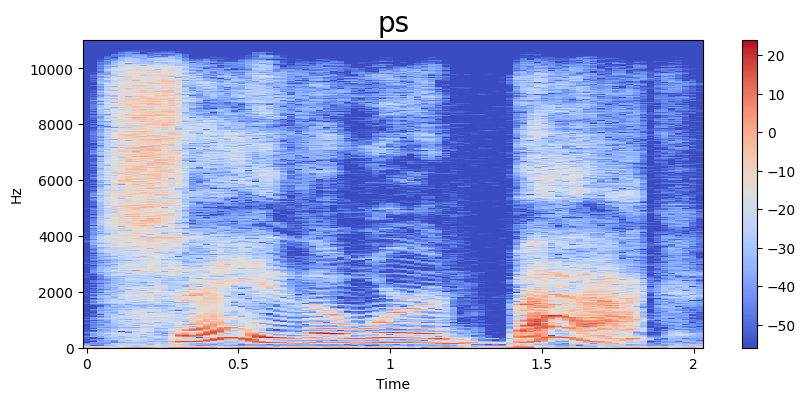

In [ ]:
emotion='ps'    #Pleasant Surprise
path=np.array(df['speech'][df['label']==emotion])[0]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

# Feature Extraction

In [ ]:
def extract_mfcc(filename):
    y,sr=librosa.load(filename,duration=3,offset=0.5)
    mfcc=np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=40).T,axis=0)
    return mfcc

In [ ]:
extract_mfcc(df['speech'][0])

array([-3.9791476e+02,  7.8756226e+01, -2.0911753e+01, -2.0349020e+01,
       -3.4199812e+00,  1.1357657e+01, -2.1622477e+01, -4.8617826e+00,
       -8.4185266e+00,  6.2100196e-01, -2.9795790e+00,  1.3149230e+00,
       -3.4300953e-01,  2.3402820e+00,  1.9168801e+00,  3.7745941e+00,
       -5.5863881e+00, -3.6113353e+00, -2.3929300e+00, -9.5256548e+00,
       -8.2061357e+00, -1.2038866e+00, -7.5688171e+00,  9.9129763e+00,
        7.9321532e+00,  2.2083347e+01,  1.8905153e+01,  2.0599804e+01,
        1.3219537e+01,  8.4827595e+00,  3.0294445e-01,  5.1541729e+00,
        9.5726032e+00,  5.4089766e+00,  2.6034532e+00, -1.9647242e+00,
        5.0509210e+00,  9.0977497e+00,  2.3394349e+00, -2.1917243e+00],
      dtype=float32)

In [ ]:
X_mfcc=df['speech'].apply(lambda x: extract_mfcc(x))

In [ ]:
X_mfcc

0       [-397.91476, 78.756226, -20.911753, -20.34902,...
1       [-466.53455, 99.911064, -0.480273, -31.616299,...
2       [-431.5178, 48.56504, -0.8924488, 2.2234004, 0...
3       [-405.01205, 78.51893, -14.72178, -20.10229, -...
4       [-435.3804, 79.39025, 8.873595, 18.061928, 6.0...
                              ...                        
5595    [-408.0878, 82.66084, 30.182566, 48.84698, -3....
5596    [-428.43256, 104.70308, 22.652096, 45.17939, 2...
5597    [-380.35938, 83.53616, 32.67897, 42.358284, -7...
5598    [-436.16336, 91.74894, 26.539776, 41.395664, -...
5599    [-423.6657, 73.28961, 29.890432, 48.220123, 2....
Name: speech, Length: 5600, dtype: object

In [ ]:
X=[x for x in X_mfcc]
X=np.array(X)
X.shape     # 1->No. of samples, 2->No. of features.

(5600, 40)

In [ ]:
## Input Split
X=np.expand_dims(X,-1)
X.shape

(5600, 40, 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder()
y=enc.fit_transform(df[['label']])

In [ ]:
y=y.toarray()

In [ ]:
y.shape

(5600, 7)

# Create LSTM Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

model=Sequential([
    LSTM(123,return_sequences=False,input_shape=(40,1)),
    Dense(64,activation='relu'),
    Dropout(0.2),
    Dense(32,activation='relu'),
    Dropout(0.2),
    Dense(7,activation='softmax')
])

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 123)               61500     
                                                                 
 dense (Dense)               (None, 64)                7936      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 231       
                                                                 
Total params: 71,747
Trainable params: 71,747
Non-traina

# Train the model

In [ ]:
history=model.fit(X,y,validation_split=0.2,epochs=100,batch_size=512,shuffle=True)

Epoch 1/100
9/9 [==============================] - 4s 266ms/step - loss: 1.8802 - accuracy: 0.2714 - val_loss: 1.8811 - val_accuracy: 0.2857
Epoch 2/100
9/9 [==============================] - 2s 207ms/step - loss: 1.6608 - accuracy: 0.4578 - val_loss: 1.5817 - val_accuracy: 0.4348
Epoch 3/100
9/9 [==============================] - 2s 197ms/step - loss: 1.3434 - accuracy: 0.5435 - val_loss: 1.1415 - val_accuracy: 0.5107
Epoch 4/100
9/9 [==============================] - 2s 199ms/step - loss: 1.0886 - accuracy: 0.5882 - val_loss: 0.8687 - val_accuracy: 0.5616
Epoch 5/100
9/9 [==============================] - 2s 196ms/step - loss: 0.8435 - accuracy: 0.6703 - val_loss: 0.6329 - val_accuracy: 0.7866
Epoch 6/100
9/9 [==============================] - 2s 198ms/step - loss: 0.6146 - accuracy: 0.7667 - val_loss: 0.4149 - val_accuracy: 0.8768
Epoch 7/100
9/9 [==============================] - 2s 193ms/step - loss: 0.4739 - accuracy: 0.8192 - val_loss: 0.3099 - val_accuracy: 0.9134
Epoch 8/100
9

# Plot Results

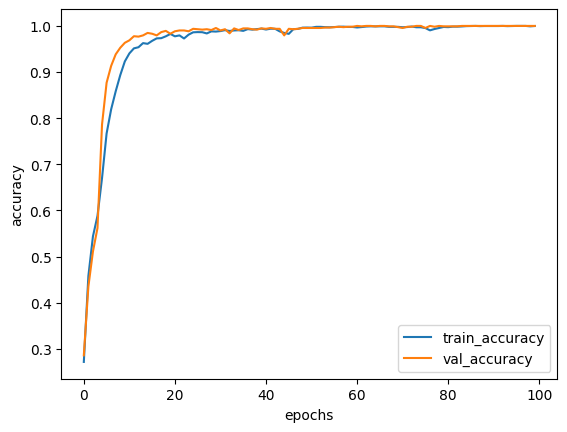

In [ ]:
epochs=list(range(100))

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

plt.plot(epochs,acc,label='train_accuracy')
plt.plot(epochs,val_acc,label='val_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.legend()
plt.show()

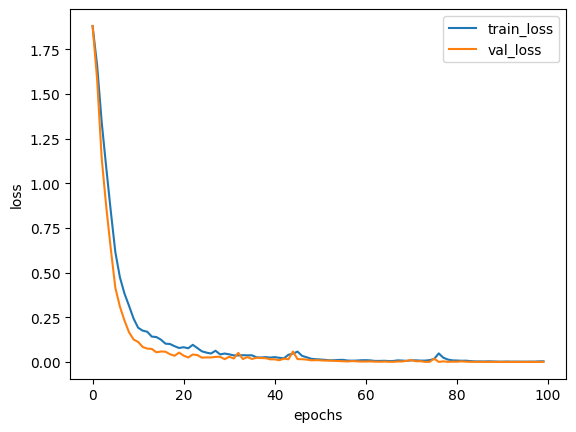

In [ ]:
loss=history.history['loss']
val_loss=history.history['val_loss']

plt.plot(epochs,loss,label='train_loss')
plt.plot(epochs,val_loss,label='val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')

plt.legend()
plt.show()